# 多步多变量预测

In [3]:
# load and clean-up data
from numpy import nan
from numpy import isnan
from pandas import read_csv
from pandas import to_numeric
 


In [7]:
# load all data
dataset = read_csv('/private/数据/2019-2020sydatahbg_utf8.csv')

In [8]:
dataset

date  沈阳过去1小时降水量(毫米)  温度/气温(摄氏度(℃))  相对湿度(百分率)  气压(百帕)  \
0        2019/1/1 23:00             0.0           -9.5         81  1016.6   
1         2019/1/2 0:00             0.0            2.5         28  1015.7   
2         2019/1/2 1:00             0.0           -8.6         54  1018.7   
3         2019/1/2 2:00             0.0            1.4         68  1016.6   
4         2019/1/2 3:00             0.0          -14.6         86  1020.1   
...                 ...             ...            ...        ...     ...   
17094  2020/12/31 18:00             0.0          -11.4         35  1021.3   
17095  2020/12/31 19:00             0.0          -12.2         37  1021.7   
17096  2020/12/31 20:00             0.0          -12.9         40  1021.8   
17097  2020/12/31 21:00             0.0          -14.0         43  1021.8   
17098  2020/12/31 22:00             0.0          -14.5         39  1021.7   

       10分钟平均风速(米/秒)  10分钟平均水平能见度(m)  
0                0.8            5872  
1                2.7           21332  
2                0.8            4061  
3                3.0            4373  
4                0.4            2516  
...              ...             ...  
17094            3.0           30000  
17095            3.1           30000  
17096            1.5           30000  
17097            2.3           30000  
17098            3.4           30000  

[17099 rows x 7 columns]

In [9]:
index_col=['date']

In [10]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import numpy as np


2024-03-25 15:58:05.965014: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-25 15:58:06.019614: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
dataset = read_csv('/private/数据/2019-2020sydatahbg_utf8.csv')

In [12]:
dataset

date  沈阳过去1小时降水量(毫米)  温度/气温(摄氏度(℃))  相对湿度(百分率)  气压(百帕)  \
0        2019/1/1 23:00             0.0           -9.5         81  1016.6   
1         2019/1/2 0:00             0.0            2.5         28  1015.7   
2         2019/1/2 1:00             0.0           -8.6         54  1018.7   
3         2019/1/2 2:00             0.0            1.4         68  1016.6   
4         2019/1/2 3:00             0.0          -14.6         86  1020.1   
...                 ...             ...            ...        ...     ...   
17094  2020/12/31 18:00             0.0          -11.4         35  1021.3   
17095  2020/12/31 19:00             0.0          -12.2         37  1021.7   
17096  2020/12/31 20:00             0.0          -12.9         40  1021.8   
17097  2020/12/31 21:00             0.0          -14.0         43  1021.8   
17098  2020/12/31 22:00             0.0          -14.5         39  1021.7   

       10分钟平均风速(米/秒)  10分钟平均水平能见度(m)  
0                0.8            5872  
1                2.7           21332  
2                0.8            4061  
3                3.0            4373  
4                0.4            2516  
...              ...             ...  
17094            3.0           30000  
17095            3.1           30000  
17096            1.5           30000  
17097            2.3           30000  
17098            3.4           30000  

[17099 rows x 7 columns]

In [14]:
# 选取需要的列
columns_to_use = ['沈阳过去1小时降水量(毫米)', '相对湿度(百分率)']
data_filtered = dataset[columns_to_use]

# 归一化
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_filtered)


In [15]:
data_scaled

array([[0.        , 0.79569892],
       [0.        , 0.22580645],
       [0.        , 0.50537634],
       ...,
       [0.        , 0.35483871],
       [0.        , 0.38709677],
       [0.        , 0.34408602]])

In [42]:
# 定义滑动窗口函数
def create_dataset(X, y, time_steps=1, out_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps - out_steps + 1):
        v = X[i:(i + time_steps)]
        Xs.append(v)
        ys.append(y[i + time_steps:i + time_steps + out_steps])
    return np.array(Xs), np.array(ys)

# 准备输入和输出
time_steps = 72  # 使用过去72个时间步
out_steps = 12  # 预测未来12个时间步
X, y = create_dataset(data_scaled, data_scaled, time_steps, out_steps)


In [43]:
y

array([[[0.        , 0.87096774],
        [0.        , 0.46236559],
        [0.        , 0.60215054],
        ...,
        [0.        , 0.61290323],
        [0.        , 0.58064516],
        [0.        , 0.19354839]],

       [[0.        , 0.46236559],
        [0.        , 0.60215054],
        [0.        , 0.44086022],
        ...,
        [0.        , 0.58064516],
        [0.        , 0.19354839],
        [0.        , 0.90322581]],

       [[0.        , 0.60215054],
        [0.        , 0.44086022],
        [0.        , 0.30107527],
        ...,
        [0.        , 0.19354839],
        [0.        , 0.90322581],
        [0.        , 0.4516129 ]],

       ...,

       [[0.        , 0.19354839],
        [0.        , 0.22580645],
        [0.        , 0.27956989],
        ...,
        [0.        , 0.30107527],
        [0.        , 0.32258065],
        [0.        , 0.35483871]],

       [[0.        , 0.22580645],
        [0.        , 0.27956989],
        [0.        , 0.38709677],
        .

In [45]:
y_reshaped = y.reshape(y.shape[0], -1)  # 将形状转换为[样本数, 预测步数*特征数]

In [46]:
y_reshaped

array([[0.        , 0.87096774, 0.        , ..., 0.58064516, 0.        ,
        0.19354839],
       [0.        , 0.46236559, 0.        , ..., 0.19354839, 0.        ,
        0.90322581],
       [0.        , 0.60215054, 0.        , ..., 0.90322581, 0.        ,
        0.4516129 ],
       ...,
       [0.        , 0.19354839, 0.        , ..., 0.32258065, 0.        ,
        0.35483871],
       [0.        , 0.22580645, 0.        , ..., 0.35483871, 0.        ,
        0.38709677],
       [0.        , 0.27956989, 0.        , ..., 0.38709677, 0.        ,
        0.34408602]])

In [47]:
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y_reshaped[:split], y_reshaped[split:]

In [48]:
model = Sequential([
    LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(out_steps * len(columns_to_use), activation='relu')
])

model.compile(optimizer='adam', loss='mse')


2024-03-25 16:50:19.461018: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-25 16:50:19.463074: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-25 16:50:19.464162: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [49]:
model.compile(optimizer='adam', loss='mse')

In [50]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2, batch_size=32, verbose=1)

Epoch 1/10


2024-03-25 16:50:55.565577: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-25 16:50:55.568242: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-25 16:50:55.569415: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

  7/341 [..............................] - ETA: 3s - loss: 0.1526   

2024-03-25 16:50:58.564170: I ./tensorflow/compiler/jit/device_compiler.h:180] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


337/341 [============================>.] - ETA: 0s - loss: 0.0567

2024-03-25 16:51:02.351137: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-25 16:51:02.353257: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-25 16:51:02.354352: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

341/341 [==============================] - 8s 12ms/step - loss: 0.0566 - val_loss: 0.0534
Epoch 2/10
341/341 [==============================] - 4s 11ms/step - loss: 0.0488 - val_loss: 0.0241
Epoch 3/10
341/341 [==============================] - 4s 11ms/step - loss: 0.0241 - val_loss: 0.0221
Epoch 4/10
341/341 [==============================] - 4s 10ms/step - loss: 0.0233 - val_loss: 0.0186
Epoch 5/10
341/341 [==============================] - 4s 10ms/step - loss: 0.0228 - val_loss: 0.0169
Epoch 6/10
341/341 [==============================] - 4s 10ms/step - loss: 0.0228 - val_loss: 0.0167
Epoch 7/10
341/341 [==============================] - 4s 11ms/step - loss: 0.0227 - val_loss: 0.0181
Epoch 8/10
341/341 [==============================] - 3s 10ms/step - loss: 0.0226 - val_loss: 0.0170
Epoch 9/10
341/341 [==============================] - 4s 11ms/step - loss: 0.0226 - val_loss: 0.0164
Epoch 10/10
341/341 [==============================] - 3s 10ms/step - loss: 0.0226 - val_loss: 0.0167


In [51]:
predictions = model.predict(X_test)

 15/107 [===>..........................] - ETA: 0s 

2024-03-25 16:53:52.135398: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-25 16:53:52.137192: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-25 16:53:52.138275: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

107/107 [==============================] - 1s 4ms/step


In [52]:
predictions_reshaped = predictions.reshape(predictions.shape[0], out_steps, len(columns_to_use))

In [53]:
import matplotlib.pyplot as plt

In [55]:
y_test_reshaped = y_test.reshape(y_test.shape[0], out_steps, len(columns_to_use))

In [56]:
# 选择要可视化的样本
sample_index = 0

# 时间步数组
time_steps = range(out_steps)

# 绘制湿度预测与实际值
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(time_steps, y_test_reshaped[sample_index, :, 0], label='Actual Humidity')
plt.plot(time_steps, predictions_reshaped[sample_index, :, 0], label='Predicted Humidity')
plt.title('Humidity Predictions vs Actual')
plt.xlabel('Time Step')
plt.ylabel('Humidity')
plt.legend()

# 绘制降水量预测与实际值
plt.subplot(1, 2, 2)
plt.plot(time_steps, y_test_reshaped[sample_index, :, 1], label='Actual Precipitation')
plt.plot(time_steps, predictions_reshaped[sample_index, :, 1], label='Predicted Precipitation')
plt.title('Precipitation Predictions vs Actual')
plt.xlabel('Time Step')
plt.ylabel('Precipitation')
plt.legend()

plt.tight_layout()
plt.show()


# 所有结果体现

In [57]:
# 计算每个时间步的平均预测值和实际值
mean_predictions_humidity = predictions_reshaped[:, :, 0].mean(axis=0)
mean_actual_humidity = y_test_reshaped[:, :, 0].mean(axis=0)

mean_predictions_precipitation = predictions_reshaped[:, :, 1].mean(axis=0)
mean_actual_precipitation = y_test_reshaped[:, :, 1].mean(axis=0)

# 时间步数组
time_steps = range(out_steps)

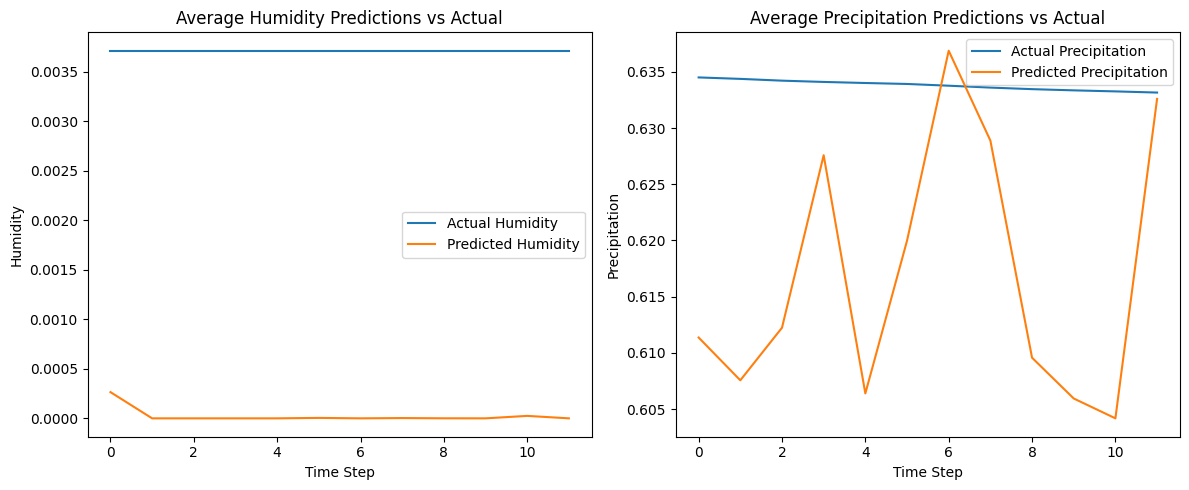

In [58]:
# 绘制湿度的平均预测与实际值
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(time_steps, mean_actual_humidity, label='Actual Humidity')
plt.plot(time_steps, mean_predictions_humidity, label='Predicted Humidity')
plt.title('Average Humidity Predictions vs Actual')
plt.xlabel('Time Step')
plt.ylabel('Humidity')
plt.legend()

# 绘制降水量的平均预测与实际值
plt.subplot(1, 2, 2)
plt.plot(time_steps, mean_actual_precipitation, label='Actual Precipitation')
plt.plot(time_steps, mean_predictions_precipitation, label='Predicted Precipitation')
plt.title('Average Precipitation Predictions vs Actual')
plt.xlabel('Time Step')
plt.ylabel('Precipitation')
plt.legend()

plt.tight_layout()
plt.show()


# 多步时间序列预测改

# .. 使用滑动窗口预测

In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# 定义模型
model = Sequential([
    # LSTM层
    LSTM(128, input_shape=(72, 2)),  # 假设每个输入样本有72个时间步，每个时间步有2个特征（湿度和降水量）
    # 输出层
    Dense(2)  # 输出下一个时间步的湿度和降水量
])

# 编译模型
model.compile(optimizer='adam', loss='mse')


2024-03-26 21:38:28.041199: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-26 21:38:28.043100: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-26 21:38:28.044212: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [62]:
# 定义滑动窗口函数
def create_dataset(X, y, time_steps=1, out_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps - out_steps + 1):
        v = X[i:(i + time_steps)]
        Xs.append(v)
        ys.append(y[i + time_steps:i + time_steps + out_steps])
    return np.array(Xs), np.array(ys)

# 准备输入和输出
time_steps = 72  # 使用过去72个时间步
out_steps = 1  # 预测未来12个时间步
X, y = create_dataset(data_scaled, data_scaled, time_steps, out_steps)

In [63]:
y

array([[[0.        , 0.87096774]],

       [[0.        , 0.46236559]],

       [[0.        , 0.60215054]],

       ...,

       [[0.        , 0.35483871]],

       [[0.        , 0.38709677]],

       [[0.        , 0.34408602]]])

In [64]:
y_reshaped = y.reshape(y.shape[0], -1) 

In [65]:
y_reshaped

array([[0.        , 0.87096774],
       [0.        , 0.46236559],
       [0.        , 0.60215054],
       ...,
       [0.        , 0.35483871],
       [0.        , 0.38709677],
       [0.        , 0.34408602]])

In [66]:
split = int(0.8 * len(X))
X_train2, X_test2 = X[:split], X[split:]
y_train2, y_test2 = y_reshaped[:split], y_reshaped[split:]

In [68]:
history = model.fit(X_train2, y_train2, epochs=50, validation_split=0.2, batch_size=32, verbose=1)

Epoch 1/50
341/341 [==============================] - 4s 11ms/step - loss: 0.0198 - val_loss: 0.0061
Epoch 2/50
341/341 [==============================] - 4s 11ms/step - loss: 0.0198 - val_loss: 0.0072
Epoch 3/50
341/341 [==============================] - 4s 11ms/step - loss: 0.0197 - val_loss: 0.0049
Epoch 4/50
341/341 [==============================] - 4s 11ms/step - loss: 0.0198 - val_loss: 0.0071
Epoch 5/50
341/341 [==============================] - 4s 11ms/step - loss: 0.0197 - val_loss: 0.0054
Epoch 6/50
341/341 [==============================] - 4s 11ms/step - loss: 0.0197 - val_loss: 0.0058
Epoch 7/50
341/341 [==============================] - 4s 11ms/step - loss: 0.0196 - val_loss: 0.0059
Epoch 8/50
341/341 [==============================] - 4s 11ms/step - loss: 0.0196 - val_loss: 0.0052
Epoch 9/50
341/341 [==============================] - 4s 11ms/step - loss: 0.0195 - val_loss: 0.0058
Epoch 10/50
341/341 [==============================] - 4s 11ms/step - loss: 0.0194 - val_lo

In [69]:
import numpy as np

def sliding_window_predict(model, initial_sequence, n_steps):
    """
    使用滑动窗口方法进行递归多步预测。
    
    参数:
    - model: 已训练的模型。
    - initial_sequence: 初始输入序列，形状为(1, 72, 2)。
    - n_steps: 要预测的总时间步数。
    
    返回:
    - predictions: 预测结果，形状为(n_steps, 2)。
    """
    # 确保初始序列的形状正确
    input_sequence = np.array(initial_sequence)
    
    # 存储预测结果
    predictions = []
    
    # 进行n_steps次预测
    for _ in range(n_steps):
        # 使用当前的输入序列进行预测
        current_pred = model.predict(input_sequence)
        
        # 存储当前预测
        predictions.append(current_pred[0])
        
        # 更新输入序列以包括最新的预测，并移除最早的时间步
        # 这里我们假设current_pred的形状为(1, 2)，表示预测的下一个时间步的湿度和降水量
        input_sequence = np.roll(input_sequence, -1, axis=1)
        input_sequence[:, -1, :] = current_pred
        
    return np.array(predictions)

# 示例：使用初始序列和模型进行预测
# initial_sequence = ... 你的初始序列数据，形状为(1, 72, 2)
# predictions = sliding_window_predict(model, initial_sequence, n_steps=12)

# 注意：这里没有提供实际的`model`和`initial_sequence`，你需要用你自己的模型和数据来替换它们。


In [70]:
X_test2

array([[[0.        , 0.74193548],
        [0.        , 0.78494624],
        [0.        , 0.76344086],
        ...,
        [0.        , 0.87096774],
        [0.        , 0.79569892],
        [0.        , 0.72043011]],

       [[0.        , 0.78494624],
        [0.        , 0.76344086],
        [0.        , 0.77419355],
        ...,
        [0.        , 0.79569892],
        [0.        , 0.72043011],
        [0.        , 0.69892473]],

       [[0.        , 0.76344086],
        [0.        , 0.77419355],
        [0.        , 0.76344086],
        ...,
        [0.        , 0.72043011],
        [0.        , 0.69892473],
        [0.        , 0.69892473]],

       ...,

       [[0.        , 0.59139785],
        [0.        , 0.5483871 ],
        [0.        , 0.5483871 ],
        ...,
        [0.        , 0.35483871],
        [0.        , 0.30107527],
        [0.        , 0.32258065]],

       [[0.        , 0.5483871 ],
        [0.        , 0.5483871 ],
        [0.        , 0.46236559],
        .

In [71]:
initial_sequence = X_test2[0:1] 

In [72]:
initial_sequence

array([[[0.        , 0.74193548],
        [0.        , 0.78494624],
        [0.        , 0.76344086],
        [0.        , 0.77419355],
        [0.        , 0.76344086],
        [0.        , 0.76344086],
        [0.        , 0.74193548],
        [0.        , 0.69892473],
        [0.        , 0.69892473],
        [0.        , 0.76344086],
        [0.        , 0.8172043 ],
        [0.        , 0.87096774],
        [0.        , 0.89247312],
        [0.        , 0.93548387],
        [0.        , 0.94623656],
        [0.        , 0.93548387],
        [0.        , 0.95698925],
        [0.        , 0.95698925],
        [0.        , 0.94623656],
        [0.        , 0.94623656],
        [0.        , 0.96774194],
        [0.        , 0.93548387],
        [0.        , 0.92473118],
        [0.        , 0.84946237],
        [0.        , 0.75268817],
        [0.        , 0.64516129],
        [0.        , 0.62365591],
        [0.        , 0.55913978],
        [0.        , 0.52688172],
        [0.   

In [73]:
initial_sequence.shape

(1, 72, 2)

In [74]:
n_steps = 12

In [75]:
predictions = sliding_window_predict(model, initial_sequence, n_steps)

1/1 [==============================] - 0s 313ms/step


2024-03-26 21:52:05.148027: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-26 21:52:05.149757: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-26 21:52:05.150922: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - 0s 22ms/step


In [76]:
predictions

array([[-2.9951385e-03,  6.5327251e-01],
       [-3.8406397e-03,  6.0964924e-01],
       [-4.1869767e-03,  5.5514306e-01],
       [-4.0275250e-03,  5.0947863e-01],
       [-3.6014393e-03,  4.8023540e-01],
       [-2.4617799e-03,  4.7132796e-01],
       [-8.2439173e-04,  4.8142511e-01],
       [ 6.6732068e-04,  5.0814456e-01],
       [ 1.6740357e-03,  5.4834372e-01],
       [ 2.2426769e-03,  5.9649307e-01],
       [ 2.4813041e-03,  6.4591402e-01],
       [ 2.3512188e-03,  6.9153047e-01]], dtype=float32)

In [78]:
X_test2.shape

(3406, 72, 2)

In [ ]:
# 假设X_test是你的测试数据集，形状为(样本数, 72, 2)
# 假设model是你已经训练好的模型
# 假设n_steps是你想要预测的步数，例如12

def sliding_window_predict(model, initial_sequence, n_steps):
    input_sequence = np.array(initial_sequence)
    predictions = []
    for _ in range(n_steps):
        current_pred = model.predict(input_sequence)
        predictions.append(current_pred[0])
        input_sequence = np.roll(input_sequence, -1, axis=1)
        input_sequence[:, -1, :] = current_pred
    return np.array(predictions)

# 初始化一个空列表来存储所有样本的预测结果
all_predictions = []

# 遍历测试集中的每个样本
for i in range(len(X_test2)):
    initial_sequence = X_test2[i:i+1]  # 选取当前样本，保持形状为(1, 72, 2)
    predictions = sliding_window_predict(model, initial_sequence, n_steps)
    all_predictions.append(predictions)

# 转换成numpy数组方便后续处理
all_predictions = np.array(all_predictions)

# all_predictions现在包含了整个测试集的预测结果，形状为(样本数, n_steps, 特征数)


1/1 [==============================] - 0s 24ms/step


In [81]:
y_test2

array([[0.        , 0.69892473],
       [0.        , 0.69892473],
       [0.        , 0.70967742],
       ...,
       [0.        , 0.35483871],
       [0.        , 0.38709677],
       [0.        , 0.34408602]])

In [82]:
y_test2.shape

(3406, 2)

In [83]:
all_predictions.shape

(3406, 12, 2)

In [86]:
y_test2[0]

array([0.        , 0.69892473])

In [87]:
all_predictions[0]

array([[-2.9951385e-03,  6.5327251e-01],
       [-3.8406397e-03,  6.0964924e-01],
       [-4.1869767e-03,  5.5514306e-01],
       [-4.0275250e-03,  5.0947863e-01],
       [-3.6014393e-03,  4.8023540e-01],
       [-2.4617799e-03,  4.7132796e-01],
       [-8.2439173e-04,  4.8142511e-01],
       [ 6.6732068e-04,  5.0814456e-01],
       [ 1.6740357e-03,  5.4834372e-01],
       [ 2.2426769e-03,  5.9649307e-01],
       [ 2.4813041e-03,  6.4591402e-01],
       [ 2.3512188e-03,  6.9153047e-01]], dtype=float32)

In [94]:
import numpy as np

# 假设y_test2是你的测试标签数据集，形状为(3406, 2)
# 初始化一个空列表来存储重新组织后的数据
y_test_reshaped = []

# 每次移动步长为1，重新组织数据
for i in range(len(y_test2) - 11):
    sample = y_test2[i:i+12]
    y_test_reshaped.append(sample)

# 转换为numpy数组
y_test_reshaped = np.array(y_test_reshaped)

# 现在y_test_reshaped的形状为(3395, 12, 2)，每个样本包含12行数据

In [95]:
y_test_reshaped

array([[[0.        , 0.69892473],
        [0.        , 0.69892473],
        [0.        , 0.70967742],
        ...,
        [0.        , 0.70967742],
        [0.        , 0.77419355],
        [0.        , 0.79569892]],

       [[0.        , 0.69892473],
        [0.        , 0.70967742],
        [0.        , 0.67741935],
        ...,
        [0.        , 0.77419355],
        [0.        , 0.79569892],
        [0.        , 0.83870968]],

       [[0.        , 0.70967742],
        [0.        , 0.67741935],
        [0.        , 0.62365591],
        ...,
        [0.        , 0.79569892],
        [0.        , 0.83870968],
        [0.        , 0.86021505]],

       ...,

       [[0.        , 0.19354839],
        [0.        , 0.22580645],
        [0.        , 0.27956989],
        ...,
        [0.        , 0.30107527],
        [0.        , 0.32258065],
        [0.        , 0.35483871]],

       [[0.        , 0.22580645],
        [0.        , 0.27956989],
        [0.        , 0.38709677],
        .

In [96]:
y_test_reshaped.shape

(3395, 12, 2)

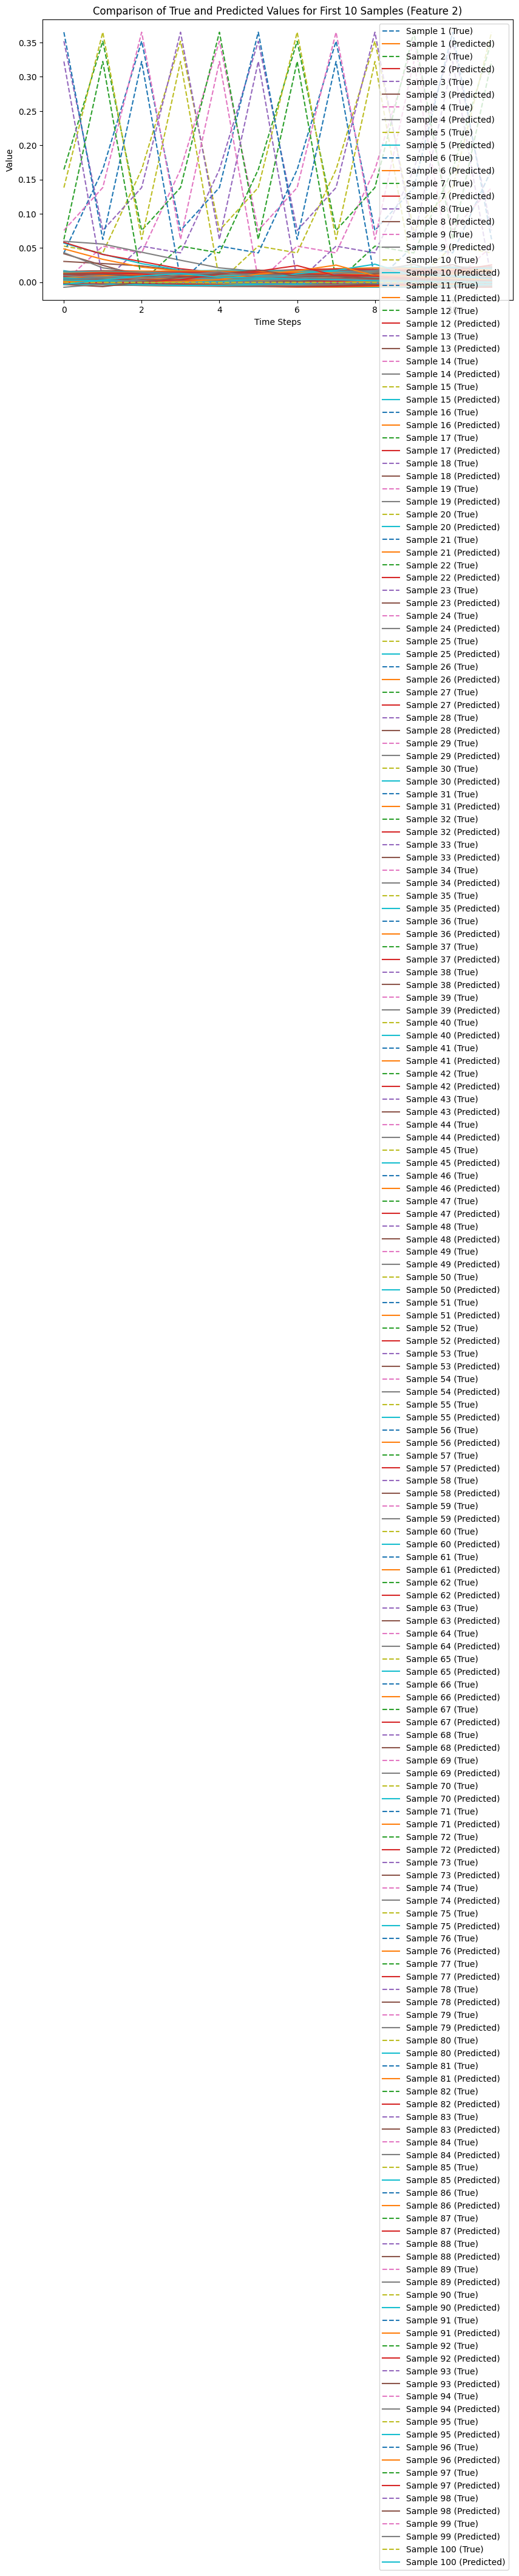

In [102]:
import matplotlib.pyplot as plt

# 取前10组数据的第二个特征
num_samples = 100
y_true_samples = y_test_reshaped[:num_samples, :, 0]  # 提取真实值的前10组数据的第二个特征
y_pred_samples = all_predictions[:num_samples, :, 0]  # 提取预测值的前10组数据的第二个特征

# 创建时间步数组，从0到11
timesteps = np.arange(12)

# 绘制真实值和预测值的对比图
plt.figure(figsize=(10, 6))
for i in range(num_samples):
    plt.plot(timesteps, y_true_samples[i], label=f'Sample {i+1} (True)', linestyle='--')
    plt.plot(timesteps, y_pred_samples[i], label=f'Sample {i+1} (Predicted)')

# 添加图例和标签
plt.legend()
plt.xlabel('Time Steps')
plt.ylabel('Value')

# 显示图形
plt.title('Comparison of True and Predicted Values for First 10 Samples (Feature 2)')
plt.show()


In [ ]:
fon sn a